Download the dataset from given links below

https://drive.google.com/file/d/1m7Q9no6lyooVtX8usysCJvwsOt8jQE-8/view?usp=sharing

https://drive.google.com/file/d/1i-9EOSCFcGX5DyXj26s_F90m7O8zcWvo/view?usp=sharing

step 1: Open the ipynb file in jupyter or Google colab

step 2: download the dataset from given link

step 3: upload it on your google drive account and access the data from your google drive , if you are using google colab

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our videos and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

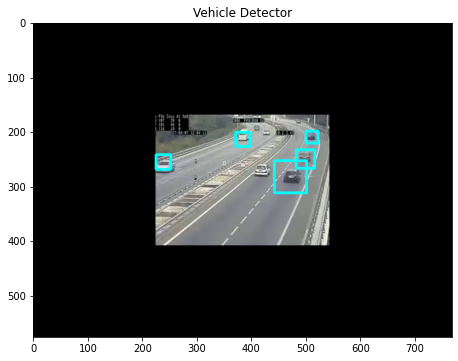

In [ ]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')
# Load our vehicle classifier
vehicle_detector=cv2.CascadeClassifier('/content/Haarcascades/haarcascade_car.xml')
# Read first frame
ret,frame=cap.read()

# Ret is True if successfully read
if ret:

  #Grayscale our image for faster processing
  gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  vehicles = vehicle_detector.detectMultiScale(gray,1.1,2)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),3)
  
# Release our video capture
cap.release()
imshow('Vehicle Detector',frame)

#### **Testing on our 15 second clip**

In [ ]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')
# Get the height and width of the frame (required to be an interfer)
w,h = int(cap.get(3)),int(cap.get(4))
vehicle_detector=cv2.CascadeClassifier('/content/Haarcascades/haarcascade_car.xml')
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file
output = cv2.VideoWriter('cars_output.avi',cv2.VideoWriter_fourcc('M','J','P','G'),30,(w,h))
# Loop once video is successfully loaded
while(1):
  ret,frame = cap.read()
  if ret:

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # Pass frame to our body classifier
    
    vehicles = vehicle_detector.detectMultiScale(gray,1.1,2)
    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in vehicles:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),3)
    # Write the frame into the file 'output.avi'
    output.write(frame)
  else:
    break

cap.release()
output.release()

In [ ]:
!ffmpeg -i /content/cars_output.avi cars_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

## play video in colab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)